# Image Filtering

## Smoothing Images

### 2D Convolution (Image Filtering)

Low-pass filters (LPF) and high-pass filters (HPF) are commonly used in signal and image processing for denoising and edge detection, respectively.

A low-pass filter helps in reducing noise by attenuating high-frequency components in a signal or image, while allowing low-frequency components to pass through. In the context of image denoising, a LPF blurs the image, smoothing out rapid changes in pixel values and reducing the impact of noise. By removing high-frequency noise, the image appears smoother and less noisy.

On the other hand, a high-pass filter emphasizes the high-frequency components of a signal or image while attenuating the low-frequency components. In image processing, a HPF can be useful for detecting and enhancing edges. It achieves this by amplifying the intensity variations or sharp transitions in pixel values, which correspond to the edges or boundaries between objects or regions in an image. By suppressing the low-frequency information, a HPF enhances the image's edges, making them more prominent and easier to detect.

In OpenCV, [filter2D](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=cv2.filter2d#filter2d) is a filtering function that replies on convolving a kernel with an image.

```Python
cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) → dst
```

Parameters:
* src – input image.
* dst – output image of the same size and the same number of channels as src.
* ddepth – desired depth of the destination image; if it is negative, it will be the same as src.depth(); the following combinations of src.depth() and ddepth are supported:
    * src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F
    * src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F
    * src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F
    * src.depth() = CV_64F, ddepth = -1/CV_64F
when ddepth=-1, the output image will have the same depth as the source.

* kernel – convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split() and process them individually.
* anchor – anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.
* delta – optional value added to the filtered pixels before storing them in dst.
* borderType – pixel extrapolation method (see borderInterpolate() for details).

To demonstrate this, we can consider the following example.

<font color='Blue'><b>Example</b></font>:

We use the sklearn [image dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) to demonstrate basic operations using Open CV.

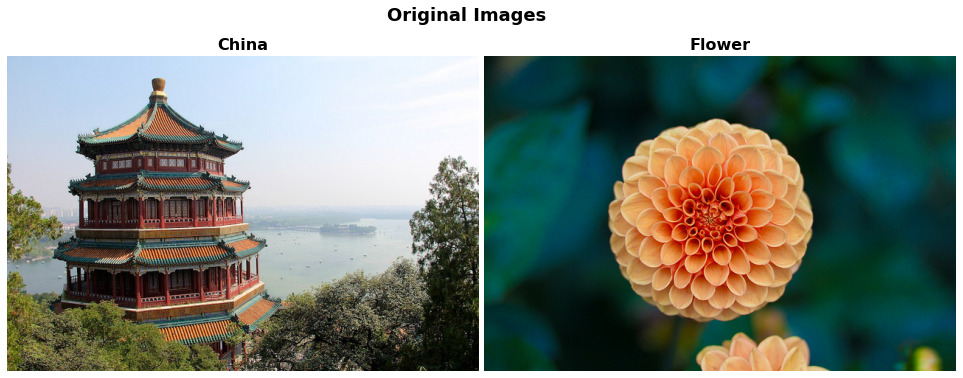

In [3]:
from sklearn.datasets import load_sample_image, load_sample_images
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

Images = load_sample_images()
Names = [x.split("\\")[-1].replace('.jpg','').title() for x in Images['filenames']]
Images = Images['images']

def ImShow(Images, Names, Title = 'Images', axis_tight = False):
    fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
    ax = ax.ravel()
    font = FontProperties()
    font.set_weight('bold')
    for i in range(2):
        _ = ax[i].imshow(Images[i])
        if axis_tight:
            _ = ax[i].axis('tight')
        _ = ax[i].set_aspect(1)
        _ = ax[i].axis('off')
        _ = ax[i].set_title(Names[i], fontproperties=font, fontsize = 16)
    _ = fig.subplots_adjust(wspace= 0.01)
    if Title:
        _ = fig.suptitle(Title, fontproperties=font, fontsize = 18)
    return fig, ax
# Image Show
_,_ = ImShow(Images, Names, Title = 'Original Images')

Let's break down the code step by step:

1. `from sklearn.datasets import load_sample_image, load_sample_images`: This line imports the `load_sample_image` and `load_sample_images` functions from the `sklearn.datasets` module. These functions are used to load sample images for demonstration purposes.

2. `import matplotlib.pyplot as plt`: This line imports the `matplotlib.pyplot` module, a popular plotting library in Python.

3. `from matplotlib.font_manager import FontProperties`: This line imports the `FontProperties` class from the `matplotlib.font_manager` module. It is used to modify the font properties of the text in the plot.

4. `Images = load_sample_images()`: This line calls the `load_sample_images` function to load the sample images. The returned object contains the images and their corresponding filenames.

5. `Names = [x.split("\\")[-1].replace('.jpg','').title() for x in Images['filenames']]`: This line extracts the filenames from the loaded sample images and processes them to remove the file extension (`.jpg`) and convert them to title case. The resulting list of names is stored in the `Names` variable.

6. `Images = Images['images']`: This line extracts the actual image data from the loaded sample images and assigns it to the `Images` variable.

7. `def ImShow(Images, Names, Title='Images', axis_tight=False):`: This line defines a function named `ImShow` that takes `Images`, `Names`, `Title`, and `axis_tight` as input parameters. This function is used to display and visualize the images.

8. `fig, ax = plt.subplots(1, 2, figsize=(17, 6))`: This line creates a figure (`fig`) and a set of subplots (`ax`) using the `plt.subplots` function. It specifies that there will be 1 row and 2 columns of subplots, resulting in two subplots side by side. The `figsize` parameter sets the size of the figure.

9. `ax = ax.ravel()`: This line flattens the `ax` array, converting it into a 1-dimensional array. This is done to make it easier to access and manipulate the subplots individually.

10. `font = FontProperties()`: This line creates a `FontProperties` object, which is used to modify the font properties of the text in the plot.

11. `font.set_weight('bold')`: This line sets the font weight of the text to bold.

12. `for i in range(2):`: This line starts a loop that iterates twice, as there are two subplots.

13. `_= ax[i].imshow(Images[i])`: This line displays the image `Images[i]` on the `i`-th subplot using the `imshow` function. The `_` is used to ignore the return value of the `imshow` function.

14. `if axis_tight:`: This line checks if the `axis_tight` parameter is set to `True`.

15. `_= ax[i].axis('tight')`: This line adjusts the axis limits to tightly fit the image if `axis_tight` is `True`.

16. `_= ax[i].set_aspect(1)`: This line sets the aspect ratio of the plot to 1, ensuring that the image is displayed without distortion.

17. `_= ax[i].axis('off')`: This line turns off the axis labels and ticks for the `i`-th subplot.

18. `_= ax

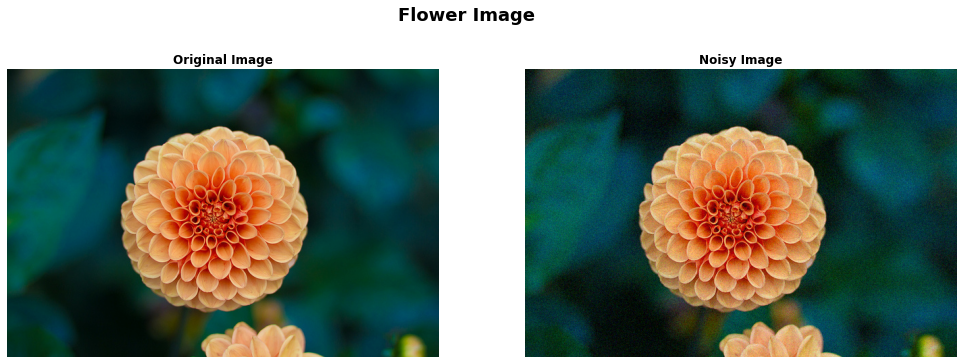

In [5]:
Img = Images[1].copy()

def ImgStd(Inp):
    '''This function standardizes image values.'''
    Out = np.round(Inp).astype(int)
    Out[Out<0] = 0
    Out[Out>255] = 255
    return Out

# Generating a noisy image using mu = 0 and sigma = 0.8
import numpy as np
mu = 0; sigma = 10
Img_noise = Img.copy() - np.random.normal(mu, sigma, size=Img.shape)
Img_noise = ImgStd(Img_noise)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
font = FontProperties()
font.set_weight('bold')

_ = fig.suptitle('Flower Image', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Img_noise)
_ = ax[1].set_title('Noisy Image', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i

Let's break down the code step by step:

1. `Img = Images[1].copy()`: This line selects the second image from the `Images` array and creates a copy of it. The selected image is assigned to the variable `Img`.

2. `def ImgStd(Inp):`: This line defines a function named `ImgStd` that takes an input image `Inp` as a parameter. This function is used to standardize the image values.

3. `Out = np.round(Inp).astype(int)`: This line rounds the pixel values of the input image `Inp` to the nearest integer and converts them to the `int` data type. The rounded values are stored in the variable `Out`.

4. `Out[Out<0] = 0`: This line sets any negative pixel values in the `Out` array to 0. This ensures that all pixel values are non-negative.

5. `Out[Out>255] = 255`: This line sets any pixel values greater than 255 in the `Out` array to 255. This ensures that all pixel values are within the valid range of 0 to 255.

6. `return Out`: This line returns the standardized image `Out` from the `ImgStd` function.

7. `mu = 0; sigma = 10`: This line defines the mean (`mu`) and standard deviation (`sigma`) for generating random noise.

8. `Img_noise = Img.copy() - np.random.normal(mu, sigma, size=Img.shape)`: This line generates random noise using the `np.random.normal` function with a mean of 0 and standard deviation of 10. The noise is subtracted from the copied `Img` array, creating a noisy version of the image. The noisy image is assigned to the variable `Img_noise`.

9. `Img_noise = ImgStd(Img_noise)`: This line applies the `ImgStd` function to the `Img_noise` image, standardizing its pixel values.

10. `fig, ax = plt.subplots(1, 2, figsize=(17, 6))`: This line creates a figure (`fig`) and a set of subplots (`ax`) using the `plt.subplots` function. It specifies that there will be 1 row and 2 columns of subplots, resulting in two subplots side by side. The `figsize` parameter sets the size of the figure.

11. `ax = ax.ravel()`: This line flattens the `ax` array, converting it into a 1-dimensional array. This is done to make it easier to access and manipulate the subplots individually.

12. `font = FontProperties()`: This line creates a `FontProperties` object, which is used to modify the font properties of the text in the plot.

13. `font.set_weight('bold')`: This line sets the font weight of the text to bold.

14. `_= fig.suptitle('Flower Image', fontproperties=font, fontsize=18)`: This line sets the title of the figure to 'Flower Image' using the `suptitle` function. The `_` is used to ignore the return value of the `suptitle` function.

15. `_= ax[0].imshow(Img)`: This line displays the original image `Img` on the first subplot using the `imshow` function. The `_` is used to ignore the return value of the `imshow` function.

16. `_= ax[0].set_title('Original Image', fontproperties=font, fontsize=12)`: This line sets the title of

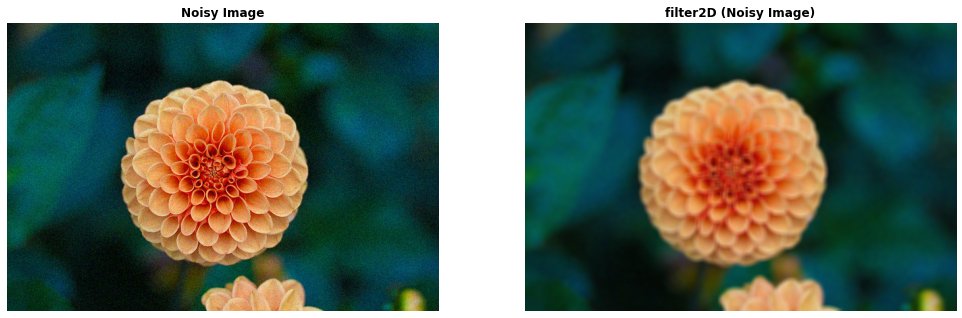

In [7]:
# We can consider a kernal as follows
kernel = np.ones((8,8),np.float32)/64

import cv2
Out = cv2.filter2D(Img_noise,-1, kernel)
Out = ImgStd(Out)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = ax[0].imshow(Img_noise)
_ = ax[0].set_title('Noisy Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('filter2D (Noisy Image)', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i
del Out, kernel

Let's break it down step by step:

1. Define a kernel: The code starts by defining a kernel using the NumPy library. The kernel is a 2D array of size 8x8 with all elements set to 1, and each element is of data type `np.float32`. This kernel will be used for filtering the image.

2. Import necessary libraries: The code imports the OpenCV library (`cv2`) and creates an alias for it.

3. Apply the filter: The `cv2.filter2D()` function is used to apply the kernel filter to the noisy image (`Img_noise`). The `-1` parameter specifies that the output image should have the same depth as the input image.

4. Image standardization: After applying the filter, the resulting image (`Out`) is passed to the `ImgStd()` function (presumably a custom function) to perform some form of image standardization or processing. The details of this function are not provided in the given code snippet.

5. Visualize the images: The code then creates a figure with two subplots using `plt.subplots()`. The first subplot displays the original noisy image (`Img_noise`), while the second subplot displays the filtered image (`Out`). The image titles are set accordingly.

6. Set plot properties: The code sets various properties for the subplots, such as the aspect ratio, turning off the axis, and adjusting the font properties.

7. Clean up: Finally, the variables `i`, `Out`, and `kernel` are deleted from memory using the `del` statements.

Note: To run this code successfully, you need to have the necessary libraries (NumPy, OpenCV, and Matplotlib) imported and initialized correctly.

## Image Blurring (Image Smoothing)

Image blurring, also known as image smoothing or image filtering, is a technique used to reduce high-frequency content in an image, such as noise and edges. It helps to remove unwanted details and create a smoother appearance. There are various methods available to apply image blurring, including:

1. Gaussian Blur: This method applies a Gaussian kernel to the image, which convolves with the image pixels to produce a weighted average of neighboring pixels. The weights are determined by the Gaussian distribution, and this blurring method is effective in reducing high-frequency noise.

2. Median Blur: In this method, each pixel in the image is replaced with the median value of its neighboring pixels. It is particularly useful for removing salt-and-pepper noise, where isolated pixels have extreme intensity values.

3. Bilateral Filter: The bilateral filter is a non-linear filter that considers both spatial and intensity differences while blurring an image. It preserves edges by reducing noise while maintaining the sharpness of significant image features.

4. Box Blur: Also known as average blur, this method replaces each pixel with the average value of its neighboring pixels. It provides a simple and uniform blurring effect but may not preserve fine details.

5. Motion Blur: This blurring effect simulates the motion of a camera or an object. It creates streak-like artifacts in the image, giving the impression of movement.

These methods can be implemented using various image processing libraries such as OpenCV in Python. The choice of blurring technique depends on the specific requirements of the application and the nature of the image content.

### Blur


Box blur, also referred to as a box linear filter or average blur, is a type of low-pass filter commonly used for blurring images. The main idea behind a box blur is to calculate the value of each pixel in the output image by averaging the values of its neighboring pixels in the input image. This averaging operation helps to reduce high-frequency details and smooth out the image.

To apply a box blur, a fixed-size rectangular window, often referred to as a kernel or filter, is placed over each pixel in the input image. The size of the window determines the extent of blurring. The value of each pixel in the output image is then calculated by taking the average of the pixel values covered by the window.

For example, if we consider a 3x3 box blur, the output value of each pixel is obtained by averaging the pixel values of the 3x3 neighborhood surrounding that pixel. This process is repeated for every pixel in the image, resulting in a blurred image.

Box blur is a simple and computationally efficient blurring technique. However, it can lead to some loss of detail and may not preserve sharp edges as effectively as other blurring methods. It is commonly used when a moderate level of blurring is desired, such as in image preprocessing tasks or as a building block in more complex blur algorithms.

Various image processing libraries, such as OpenCV in Python, provide functions to apply box blur filters to images with different kernel sizes, allowing users to control the amount of blurring applied based on their specific needs.

Moroever, [Blur](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=cv2.blur#blur) is a OpenCV function that blurs an image using the normalized box filter

```Python
cv2.blur(src, ksize[, dst[, anchor[, borderType]]]) → dst
```

**Parameters**:
* src – input image; it can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
* dst – output image of the same size and type as src.
* ksize – blurring kernel size.
* anchor – anchor point; default value Point(-1,-1) means that the anchor is at the kernel center.
* borderType – border mode used to extrapolate pixels outside of the image.

The kernel function here:

$$\texttt{K} =  \frac{1}{\texttt{ksize.width*ksize.height}} \begin{bmatrix} 1 & 1 & 1 &  \cdots & 1 & 1  \\ 1 & 1 & 1 &  \cdots & 1 & 1  \\ \vdots & \vdots & \vdots &  \vdots & \vdots & \vdots \\ 1 & 1 & 1 &  \cdots & 1 & 1  \\ \end{bmatrix}$$

<font color='Blue'><b>Example</b></font>:

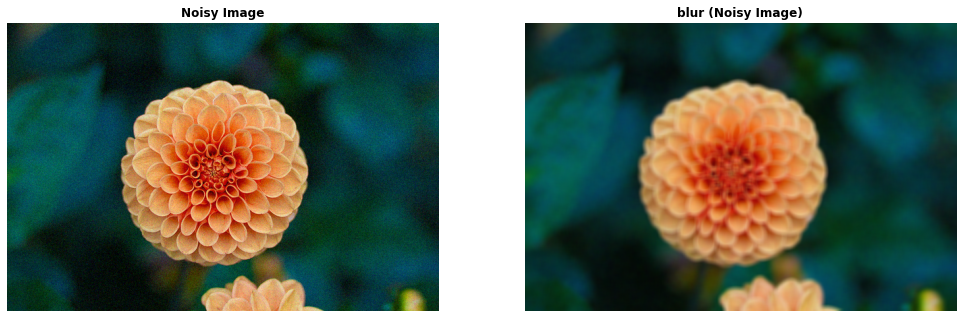

In [8]:
Out = cv2.blur(Img_noise,(8,8))

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = ax[0].imshow(Img_noise)
_ = ax[0].set_title('Noisy Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('blur (Noisy Image)', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i
del Out

Let's break down the code step by step:

1. Apply the box blur filter: The `cv2.blur()` function is used to apply the box blur filter to the noisy image (`Img_noise`). The `(8,8)` parameter specifies the size of the blur kernel as an 8x8 rectangular window.

2. Visualize the images: The code then creates a figure with two subplots using `plt.subplots()`. The first subplot displays the original noisy image (`Img_noise`), while the second subplot displays the blurred image (`Out`). The image titles are set accordingly.

3. Set plot properties: The code sets various properties for the subplots, such as the aspect ratio, turning off the axis, and adjusting the font properties.

4. Clean up: The variable `i` and `Out` are deleted from memory using the `del` statements.

Note: To run this code successfully, you need to have the necessary libraries (OpenCV and Matplotlib) imported and initialized correctly.

To see this filter better, we can consider using an image with some text phrases.

<font color='Blue'><b>Example</b></font>:

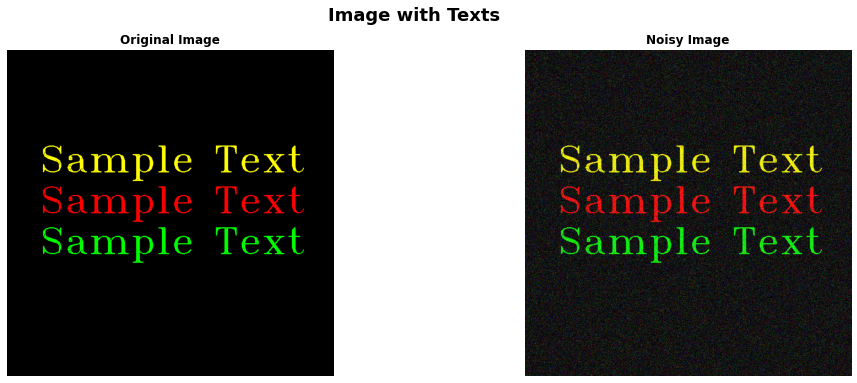

In [9]:
Colors={'White':(255, 255, 255), 'Black':(0, 0, 0), 'Red':(255,0,0),'Green':(0,255,0), 'Blue':(0,0,255),
        'Yellow':(255,255,0), 'Purple':(128,0,128), 'Indigo':(75,0,130),'OrangeRed':(255,69,0)}

Img2 = np.zeros((800, 800, 3), np.uint8)

Img2 = cv2.putText(Img2, text = 'Sample Text', org = (80, 300),
                  fontFace = cv2.FONT_HERSHEY_TRIPLEX, fontScale = 3, color = Colors['Yellow'], thickness = 2)

Img2 = cv2.putText(Img2, text = 'Sample Text', org = (80, 400),
                  fontFace = cv2.FONT_HERSHEY_TRIPLEX, fontScale = 3, color = Colors['Red'], thickness = 2)

Img2 = cv2.putText(Img2, text = 'Sample Text', org = (80, 500),
                  fontFace = cv2.FONT_HERSHEY_TRIPLEX, fontScale = 3, color = Colors['Green'], thickness = 2)

# Generating a noisy image using mu = 0 and sigma = 0.8
mu = 0; sigma = 50
Img2_noise = Img2.copy() - np.random.normal(mu, sigma, size=Img2.shape)
Img2_noise = ImgStd(Img2_noise)


fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Image with Texts', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img2)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Img2_noise)
_ = ax[1].set_title('Noisy Image', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i

Let's go through the code step by step:

1. Define color dictionary: The code defines a dictionary called `Colors` that maps color names to their corresponding RGB values. Each color is represented as a tuple of three integers representing the red, green, and blue color channels.

2. Create an empty image: The code creates an empty image `Img2` with dimensions 800x800 and three color channels using the NumPy library. The data type of the image is set to `np.uint8`.

3. Add text to the image: The `cv2.putText()` function is used multiple times to add text to the `Img2` image. Each `cv2.putText()` call specifies the text content, position (`org`), font face (`fontFace`), font scale (`fontScale`), color, and thickness of the text. The color is retrieved from the `Colors` dictionary using color names like 'Yellow', 'Red', and 'Green'.

4. Generate noisy image: The code creates a copy of `Img2` named `Img2_noise`. Gaussian noise is added to `Img2_noise` by subtracting random values drawn from a normal distribution with mean `mu` (0) and standard deviation `sigma` (50). The resulting noisy image is passed to the `ImgStd()` function (presumably a custom function) for some form of image standardization or processing.

5. Visualize the images: The code creates a figure with two subplots using `plt.subplots()`. The first subplot displays the original image with text (`Img2`), and the second subplot displays the noisy image with text (`Img2_noise`). The image titles and the title for the entire figure are set accordingly.

6. Set plot properties: The code sets various properties for the subplots and the figure, such as the aspect ratio, turning off the axis, and adjusting the font properties.

7. Clean up: The variable `i` is deleted from memory using the `del` statement.

Note: To run this code successfully, you need to have the necessary libraries (NumPy, OpenCV, and Matplotlib) imported and initialized correctly.

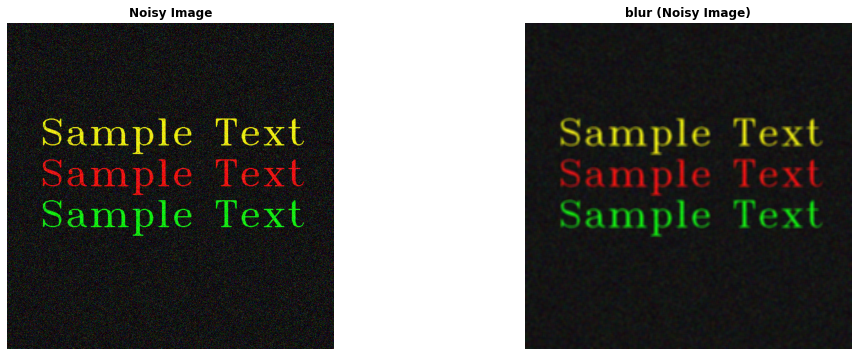

In [10]:
Out = cv2.blur(Img2_noise,(8,8))

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = ax[0].imshow(Img2_noise)
_ = ax[0].set_title('Noisy Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('blur (Noisy Image)', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i
del Out

Let's break it down step by step:

1. Apply the box blur filter: The `cv2.blur()` function is used to apply the box blur filter to the noisy image with text (`Img2_noise`). The `(8,8)` parameter specifies the size of the blur kernel as an 8x8 rectangular window.

2. Visualize the images: The code then creates a figure with two subplots using `plt.subplots()`. The first subplot displays the original noisy image with text (`Img2_noise`), while the second subplot displays the blurred image (`Out`). The image titles are set accordingly.

3. Set plot properties: The code sets various properties for the subplots, such as the aspect ratio, turning off the axis, and adjusting the font properties.

4. Clean up: The variables `i` and `Out` are deleted from memory using the `del` statements.

Note: To run this code successfully, you need to have the necessary libraries (OpenCV and Matplotlib) imported and initialized correctly. Additionally, make sure the `Img2_noise` variable is correctly generated or defined before applying the blur filter.

### Box Filter

[Box Filter](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=cv2.blur#boxfilter) is a OpenCV function that blurs an image using the box filter.

```Python
cv2.boxFilter(src, ddepth, ksize[, dst[, anchor[, normalize[, borderType]]]]) → dst
```

Parameters:
* src – input image.
* dst – output image of the same size and type as src.
* ddepth – the output image depth (-1 to use src.depth()).
* ksize – blurring kernel size.
* anchor – anchor point; default value Point(-1,-1) means that the anchor is at the kernel center.
* normalize – flag, specifying whether the kernel is normalized by its area or not.
* borderType – border mode used to extrapolate pixels outside of the image.

The function smoothes an image using the kernel:

$$\texttt{K} =  \alpha \begin{bmatrix} 1 & 1 & 1 &  \cdots & 1 & 1  \\ 1 & 1 & 1 &  \cdots & 1 & 1  \\ \vdots & \vdots & \vdots &  \vdots & \vdots & \vdots \\ 1 & 1 & 1 &  \cdots & 1 & 1  \\ \end{bmatrix}$$

where

$$\alpha = \begin{cases}
\frac{1}{\texttt{ksize.width*ksize.height}}, & \mbox{when normalize=true},\\
1, & \mbox{Otherwise}.
\end{cases}$$

<font color='Blue'><b>Example</b></font>:

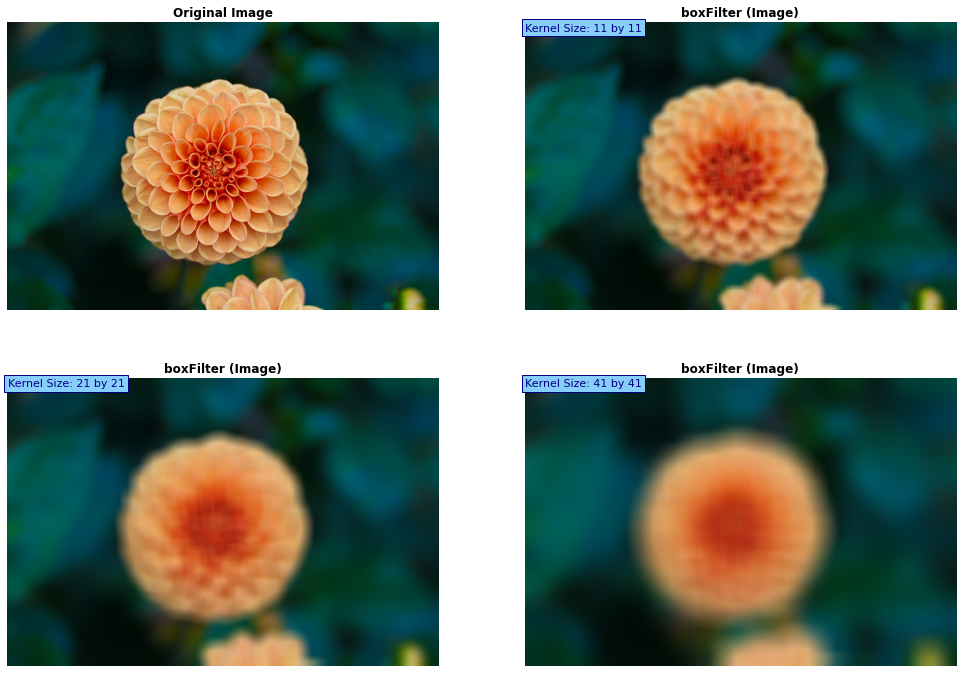

In [11]:
fig, ax = plt.subplots(2, 2 , figsize = (17, 2*6))
ax = ax.ravel()
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)

for i in range(1,4):
    k = (2**(i-1))*10+1
    _ = ax[i].imshow(cv2.boxFilter(src = Img, ddepth = -1, ksize = (k, k)))
    _ = ax[i].set_title('boxFilter (Image)', fontproperties=font, fontsize = 12)
    _ = ax[i].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Kernel Size: %i by %i' % (k, k),
                   size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
    
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i, k

Let's go through the code step by step:

1. Create subplots: The code uses `plt.subplots()` to create a figure with 2 rows and 2 columns of subplots. The `figsize` parameter sets the size of the figure to (17, 2*6) units. The subplots are stored in the variables `fig` and `ax`.

2. Set the first subplot: The code selects the first subplot (`ax[0]`) and displays the original image (`Img`) using `ax[0].imshow()`. The title of the subplot is set to 'Original Image' using `ax[0].set_title()`.

3. Apply box filter and create subplots: The code enters a loop that iterates from 1 to 3. In each iteration, it calculates the kernel size `k` based on the loop index (`i`). The kernel size increases exponentially by a factor of 2 (starting from 1) multiplied by 10, plus 1. 

4. Apply box filter to image: Inside the loop, the code applies the box filter to the original image using `cv2.boxFilter()`. The `src` parameter is set to `Img` (original image), `ddepth` is set to -1 to maintain the same depth as the input image, and `ksize` is set to the calculated kernel size `(k, k)`.

5. Set subplot properties: For each iteration, the code sets the title of the subplot to 'boxFilter (Image)' using `ax[i].set_title()`. Additionally, it adds a text box below the title to display the current kernel size using `ax[i].text()`. The kernel size is formatted as 'Kernel Size: x by x', where 'x' represents the current kernel size.

6. Set plot properties: After the loop, the code sets various properties for all subplots. It sets the aspect ratio to 1, hides the axis, and turns off the grid.

7. Clean up: The variables `i` and `k` are deleted from memory using the `del` statements.

Note: To run this code successfully, you need to have the necessary libraries (Matplotlib and OpenCV) imported and initialized correctly. Additionally, ensure that the `Img` variable contains a valid image before applying the box filter.

### Gaussian Blur

Gaussian function in one dimension can be defined as
$$G(x)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {x^{2}}{2\sigma ^{2}}}}$$
In two dimensions, it is the product of two such Gaussian functions, one in each dimension:
$$G(x,y)={\frac {1}{2\pi \sigma ^{2}}}e^{-{\frac {x^{2}+y^{2}}{2\sigma ^{2}}}}$$
where x is the distance from the origin in the horizontal axis, y is the distance from the origin in the vertical axis, and σ is the standard deviation of the Gaussian distribution.

In OpenCV, [Gaussian Blur](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=cv2.blur#gaussianblur) is defined as follows.

```Python
cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) → dst
```

**Parameters**:
* src – input image; the image can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
* dst – output image of the same size and type as src.
* ksize – Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be zero’s and then they are computed from sigma* .
* sigmaX – Gaussian kernel standard deviation in X direction.
* sigmaY – Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height , respectively (see getGaussianKernel() for details); to fully control the result regardless of possible future modifications of all this semantics, it is recommended to specify all of ksize, sigmaX, and sigmaY.
* borderType – pixel extrapolation method (see borderInterpolate() for details).

<font color='Blue'><b>Example</b></font>:

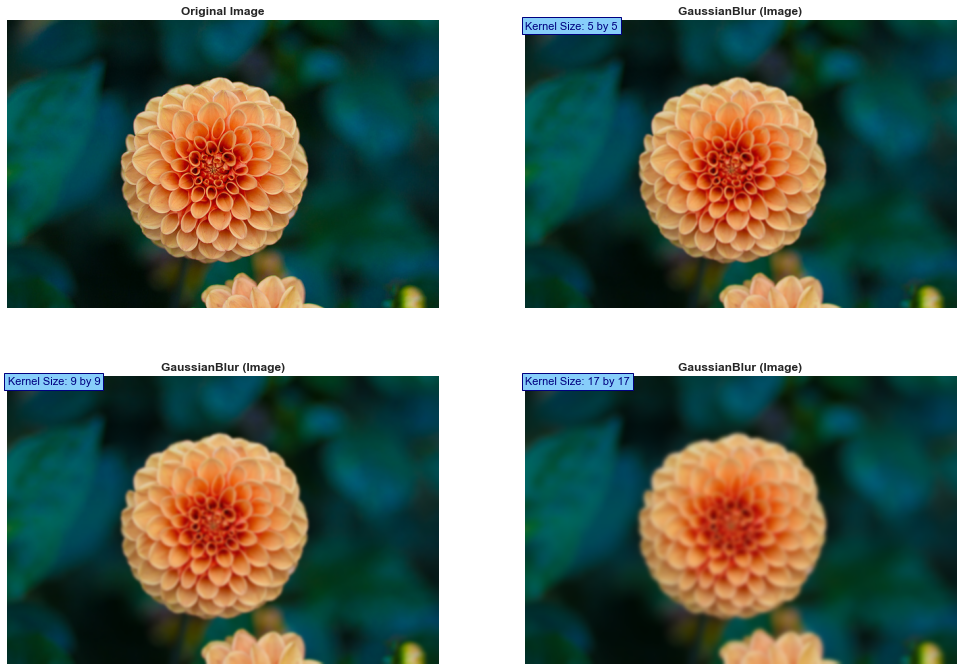

In [9]:
fig, ax = plt.subplots(2, 2 , figsize = (17, 2*6))
ax = ax.ravel()
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)

for i in range(1,4):
    k = (2**(i-1))*4+1
    _ = ax[i].imshow(cv2.GaussianBlur(src = Img, ksize = (k, k), sigmaX = 0))
    _ = ax[i].set_title('GaussianBlur (Image)', fontproperties=font, fontsize = 12)
    _ = ax[i].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Kernel Size: %i by %i' % (k, k),
                   size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i, k

Let's go through the code step by step:

1. Create subplots: The code uses `plt.subplots()` to create a figure with 2 rows and 2 columns of subplots. The `figsize` parameter sets the size of the figure to (17, 2*6) units. The subplots are stored in the variables `fig` and `ax`.

2. Set the first subplot: The code selects the first subplot (`ax[0]`) and displays the original image (`Img`) using `ax[0].imshow()`. The title of the subplot is set to 'Original Image' using `ax[0].set_title()`.

3. Apply Gaussian blur and create subplots: The code enters a loop that iterates from 1 to 3. In each iteration, it calculates the kernel size `k` based on the loop index (`i`). The kernel size increases exponentially by a factor of 2 (starting from 1) multiplied by 4, plus 1.

4. Apply Gaussian blur to image: Inside the loop, the code applies the Gaussian blur filter to the original image using `cv2.GaussianBlur()`. The `src` parameter is set to `Img` (original image), `ksize` is set to the calculated kernel size `(k, k)`, and `sigmaX` is set to 0.

5. Set subplot properties: For each iteration, the code sets the title of the subplot to 'GaussianBlur (Image)' using `ax[i].set_title()`. Additionally, it adds a text box below the title to display the current kernel size using `ax[i].text()`. The kernel size is formatted as 'Kernel Size: x by x', where 'x' represents the current kernel size.

6. Set plot properties: After the loop, the code sets various properties for all subplots. It sets the aspect ratio to 1, hides the axis, and turns off the grid.

7. Clean up: The variables `i` and `k` are deleted from memory using the `del` statements.

Note: To run this code successfully, you need to have the necessary libraries (Matplotlib and OpenCV) imported and initialized correctly. Additionally, ensure that the `Img` variable contains a valid image before applying the Gaussian blur filter.

### Median Blur

The median filter is often used to remove noise from an image that preserves edges while removing noise. See [A Fast Two-Dimensional Median Filtering Algorithm](https://www.uio.no/studier/emner/matnat/ifi/INF2310/v12/undervisningsmateriale/artikler/Huang-etal-median.pdf) by Thomas S. Huang et al. for more details regarding this filter.



[Median Blur](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=cv2.blur#medianblur) is a OpenCV function that blurs an image using the median filter.

```Python
cv2.medianBlur(src, ksize[, dst]) → dst
```

Parameters:
* src – input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.
* dst – destination array of the same size and type as src.
* ksize – aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...

<font color='Blue'><b>Example</b></font>:

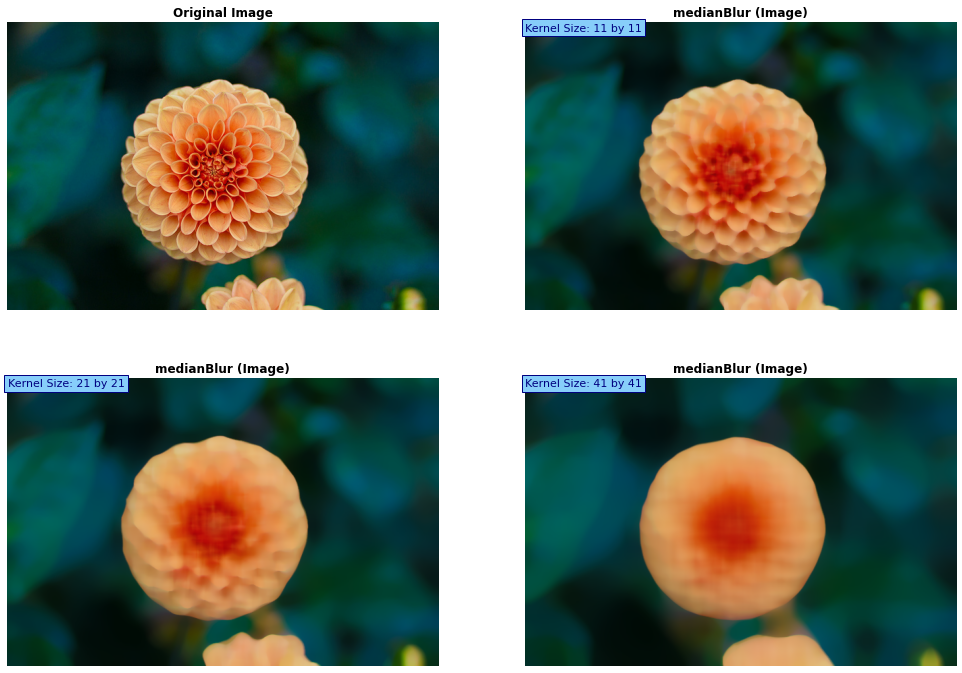

In [12]:
fig, ax = plt.subplots(2, 2 , figsize = (17, 2*6))
ax = ax.ravel()
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)

for i in range(1,4):
    k = (2**(i-1))*10+1
    _ = ax[i].imshow(cv2.medianBlur(Img, k, cv2.BORDER_DEFAULT))
    _ = ax[i].set_title('medianBlur (Image)', fontproperties=font, fontsize = 12)
    _ = ax[i].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Kernel Size: %i by %i' % (k, k),
                   size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i, k

Let's go through the code step by step:

1. Create subplots: The code uses `plt.subplots()` to create a figure with 2 rows and 2 columns of subplots. The `figsize` parameter sets the size of the figure to (17, 2*6) units. The subplots are stored in the variables `fig` and `ax`.

2. Set the first subplot: The code selects the first subplot (`ax[0]`) and displays the original image (`Img`) using `ax[0].imshow()`. The title of the subplot is set to 'Original Image' using `ax[0].set_title()`.

3. Apply median blur and create subplots: The code enters a loop that iterates from 1 to 3. In each iteration, it calculates the kernel size `k` based on the loop index (`i`). The kernel size increases exponentially by a factor of 2 (starting from 1) multiplied by 10, plus 1.

4. Apply median blur to image: Inside the loop, the code applies the median blur filter to the original image using `cv2.medianBlur()`. The `Img` parameter is the original image, `k` is the kernel size, and `cv2.BORDER_DEFAULT` specifies the border mode for handling image borders.

5. Set subplot properties: For each iteration, the code sets the title of the subplot to 'medianBlur (Image)' using `ax[i].set_title()`. Additionally, it adds a text box below the title to display the current kernel size using `ax[i].text()`. The kernel size is formatted as 'Kernel Size: x by x', where 'x' represents the current kernel size.

6. Set plot properties: After the loop, the code sets various properties for all subplots. It sets the aspect ratio to 1, hides the axis, and turns off the grid.

7. Clean up: The variables `i` and `k` are deleted from memory using the `del` statements.

Note: To run this code successfully, you need to have the necessary libraries (Matplotlib and OpenCV) imported and initialized correctly. Additionally, ensure that the `Img` variable contains a valid image before applying the median blur filter.

### Bilateral Filtering

A [bilateral filter](https://en.wikipedia.org/wiki/Bilateral_filter) is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. The bilateral filter is defined as
$$I^{\text{filtered}}(x)={\frac {1}{W_{p}}}\sum _{x_{i}\in \Omega }I(x_{i})f_{r}(\|I(x_{i})-I(x)\|)g_{s}(\|x_{i}-x\|).$$

where 
* $I^\text{filtered}$  is the filtered image,
* $I$ is the original input image to be filtered,
* $x$ are the coordinates of the current pixel to be filtered,
* $\Omega$  is the window centered in $x$, so $x_{i}\in \Omega$ is another pixel,
* $f_r$ is the range kernel for smoothing differences in intensities (this function can be a Gaussian function),
* $g_{s}$ is the spatial (or domain) kernel for smoothing differences in coordinates (this function can be a Gaussian function).
* $W_{p}$ is the normalization term, and it is defined as follows
$$\displaystyle W_{p}=\sum _{x_{i}\in \Omega }{f_{r}(\|I(x_{i})-I(x)\|)g_{s}(\|x_{i}-x\|)}$$

See [Bilateral Filtering for Gray and Color Images](http://www.dai.ed.ac.uk/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html) for more details about Bilateral Filtering.

In OpenCV, [Bilateral Filtering](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=cv2.blur#bilateralfilter) is a function that applies the bilateral filter to an image.

```Python
cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) → dst
```

**Parameters**:
* src – Source 8-bit or floating-point, 1-channel or 3-channel image.
* dst – Destination image of the same size and type as src .
* d – Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace .
* sigmaColor – Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace ) will be mixed together, resulting in larger areas of semi-equal color.
* sigmaSpace – Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0 , it specifies the neighborhood size regardless of sigmaSpace . Otherwise, d is proportional to sigmaSpace .

Moreover, for adaptive bilateral filter, see this [article](https://arxiv.org/pdf/1811.02308.pdf).

<font color='Blue'><b>Example</b></font>:

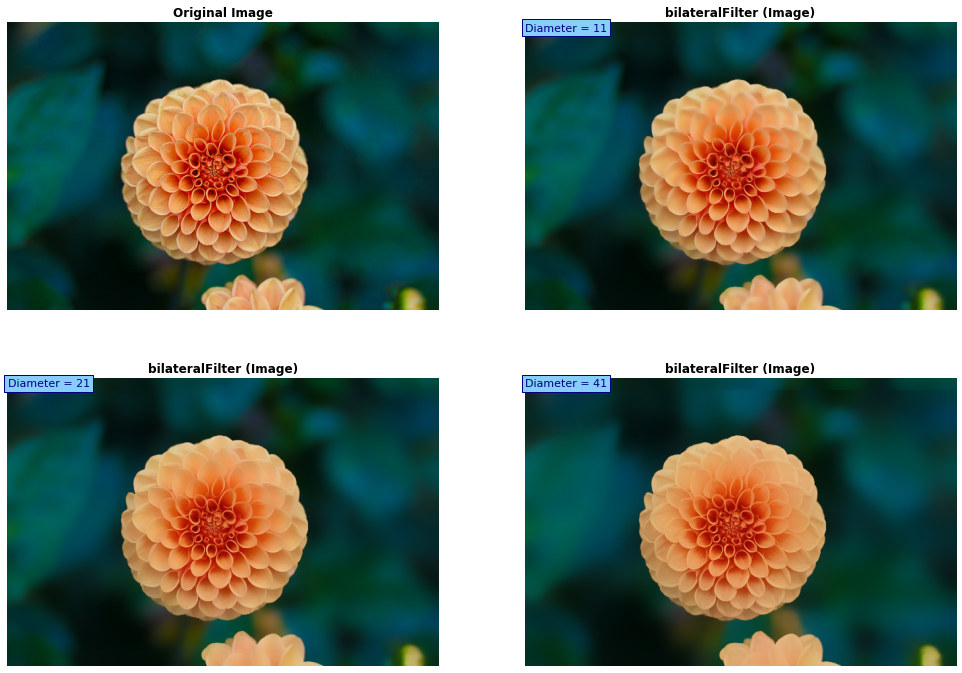

In [13]:
fig, ax = plt.subplots(2, 2 , figsize = (17, 2*6))
ax = ax.ravel()
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)

for i in range(1,4):
    k = (2**(i-1))*10+1
    _ = ax[i].imshow(cv2.bilateralFilter(src = Img, d = k, sigmaColor = 75, sigmaSpace = 75))
    _ = ax[i].set_title('bilateralFilter (Image)', fontproperties=font, fontsize = 12)
    _ = ax[i].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Diameter = %i' % k,
                   size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i, k

Let's go through the code step by step:

1. Create subplots: The code uses `plt.subplots()` to create a figure with 2 rows and 2 columns of subplots. The `figsize` parameter sets the size of the figure to (17, 2*6) units. The subplots are stored in the variables `fig` and `ax`.

2. Set the first subplot: The code selects the first subplot (`ax[0]`) and displays the original image (`Img`) using `ax[0].imshow()`. The title of the subplot is set to 'Original Image' using `ax[0].set_title()`.

3. Apply bilateral filter and create subplots: The code enters a loop that iterates from 1 to 3. In each iteration, it calculates the diameter `k` based on the loop index (`i`). The diameter increases exponentially by a factor of 2 (starting from 1) multiplied by 10, plus 1.

4. Apply bilateral filter to image: Inside the loop, the code applies the bilateral filter to the original image using `cv2.bilateralFilter()`. The `src` parameter is set to `Img` (original image), `d` is set to the calculated diameter `k`, `sigmaColor` is set to 75, and `sigmaSpace` is set to 75.

5. Set subplot properties: For each iteration, the code sets the title of the subplot to 'bilateralFilter (Image)' using `ax[i].set_title()`. Additionally, it adds a text box below the title to display the current diameter using `ax[i].text()`. The diameter is formatted as 'Diameter = x', where 'x' represents the current diameter value.

6. Set plot properties: After the loop, the code sets various properties for all subplots. It sets the aspect ratio to 1, hides the axis, and turns off the grid.

7. Clean up: The variables `i` and `k` are deleted from memory using the `del` statements.

Note: To run this code successfully, you need to have the necessary libraries (Matplotlib and OpenCV) imported and initialized correctly. Additionally, ensure that the `Img` variable contains a valid image before applying the bilateral filter.

***

## Refrences
1. [OpenCV documentation](https://docs.opencv.org/2.4/index.html)
1. [Smoothing Images](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html#smoothing-images)
1. [Box Blur](https://en.wikipedia.org/wiki/Box_blur)
1. [Gaussian blur](https://en.wikipedia.org/wiki/Gaussian_blur)
1. [Bilateral filter](https://en.wikipedia.org/wiki/Bilateral_filter)
1. Huang, T., G. J. T. G. Y. Yang, and Greory Tang. "[A fast two-dimensional median filtering algorithm.](https://www.uio.no/studier/emner/matnat/ifi/INF2310/v12/undervisningsmateriale/artikler/Huang-etal-median.pdf)" IEEE Transactions on Acoustics, Speech, and Signal Processing 27.1 (1979): 13-18.
1. Gavaskar, Ruturaj G., and Kunal N. Chaudhury. "[Fast adaptive bilateral filtering.](https://arxiv.org/pdf/1811.02308.pdf)" IEEE Transactions on Image Processing 28.2 (2018): 779-790.
***